In [1]:
import numpy as np
from imageio import imread
import pandas as pd
import matplotlib.pyplot as plt
from glob import iglob
import seaborn as sns
from sklearn import preprocessing

(512, 512)

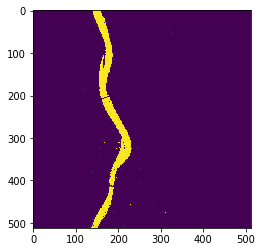

In [3]:
# Testing the fact that whether the images are loading in proper format
img = imread('op1.jpeg')
img = img.astype(np.uint8)
img = img/255
plt.imshow(img)
img.shape

In [4]:
# make the dataset
X = pd.DataFrame([])
for path in iglob('*.gif'):
    img = imread(path)
    riv = pd.Series(img.flatten(), name = path)
    X = X.append(riv)
    
X = np.array(X)
    
n_bands=4

In [5]:
#Preparing matrix and finding covariance 
MB_matrix = np.zeros((512*512,4))

for i in range(4):
    MB_array = X[i]  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd

np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

In [6]:
# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)
print("Eigenvalues:\n\n", EigVal,"\n")
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]
PC = np.matmul(MB_matrix,EigVec)

Eigenvalues:

 [2.784 0.956 0.185 0.075] 



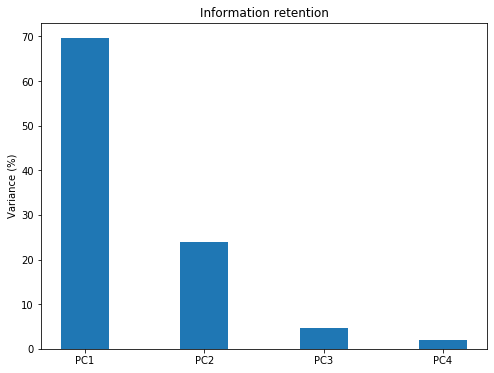

In [7]:
# Scree plot - Shows how much influence does each PC basis vector has
plt.figure(figsize=(8,6))
plt.bar([1,2,3,4],EigVal/sum(EigVal)*100,align='center',width=0.4,
        tick_label = ['PC1','PC2','PC3','PC4'])
plt.ylabel('Variance (%)')
plt.title('Information retention');

In [8]:
#Converting the array back to image format
PC_2d = np.zeros((512,512,4))
for i in range(4):
    PC_2d[:,:,i] = PC[:,i].reshape(-1,512)

In [9]:
# normalizing between 0 to 255
PC_2d_Norm = np.zeros((512,512,4))
for i in range(4):
    PC_2d_Norm[:,:,i] = 255*(PC_2d[:,:,i] - np.min(PC_2d[:,:,i]))/np.ptp(PC_2d[:,:,i]).astype(int)

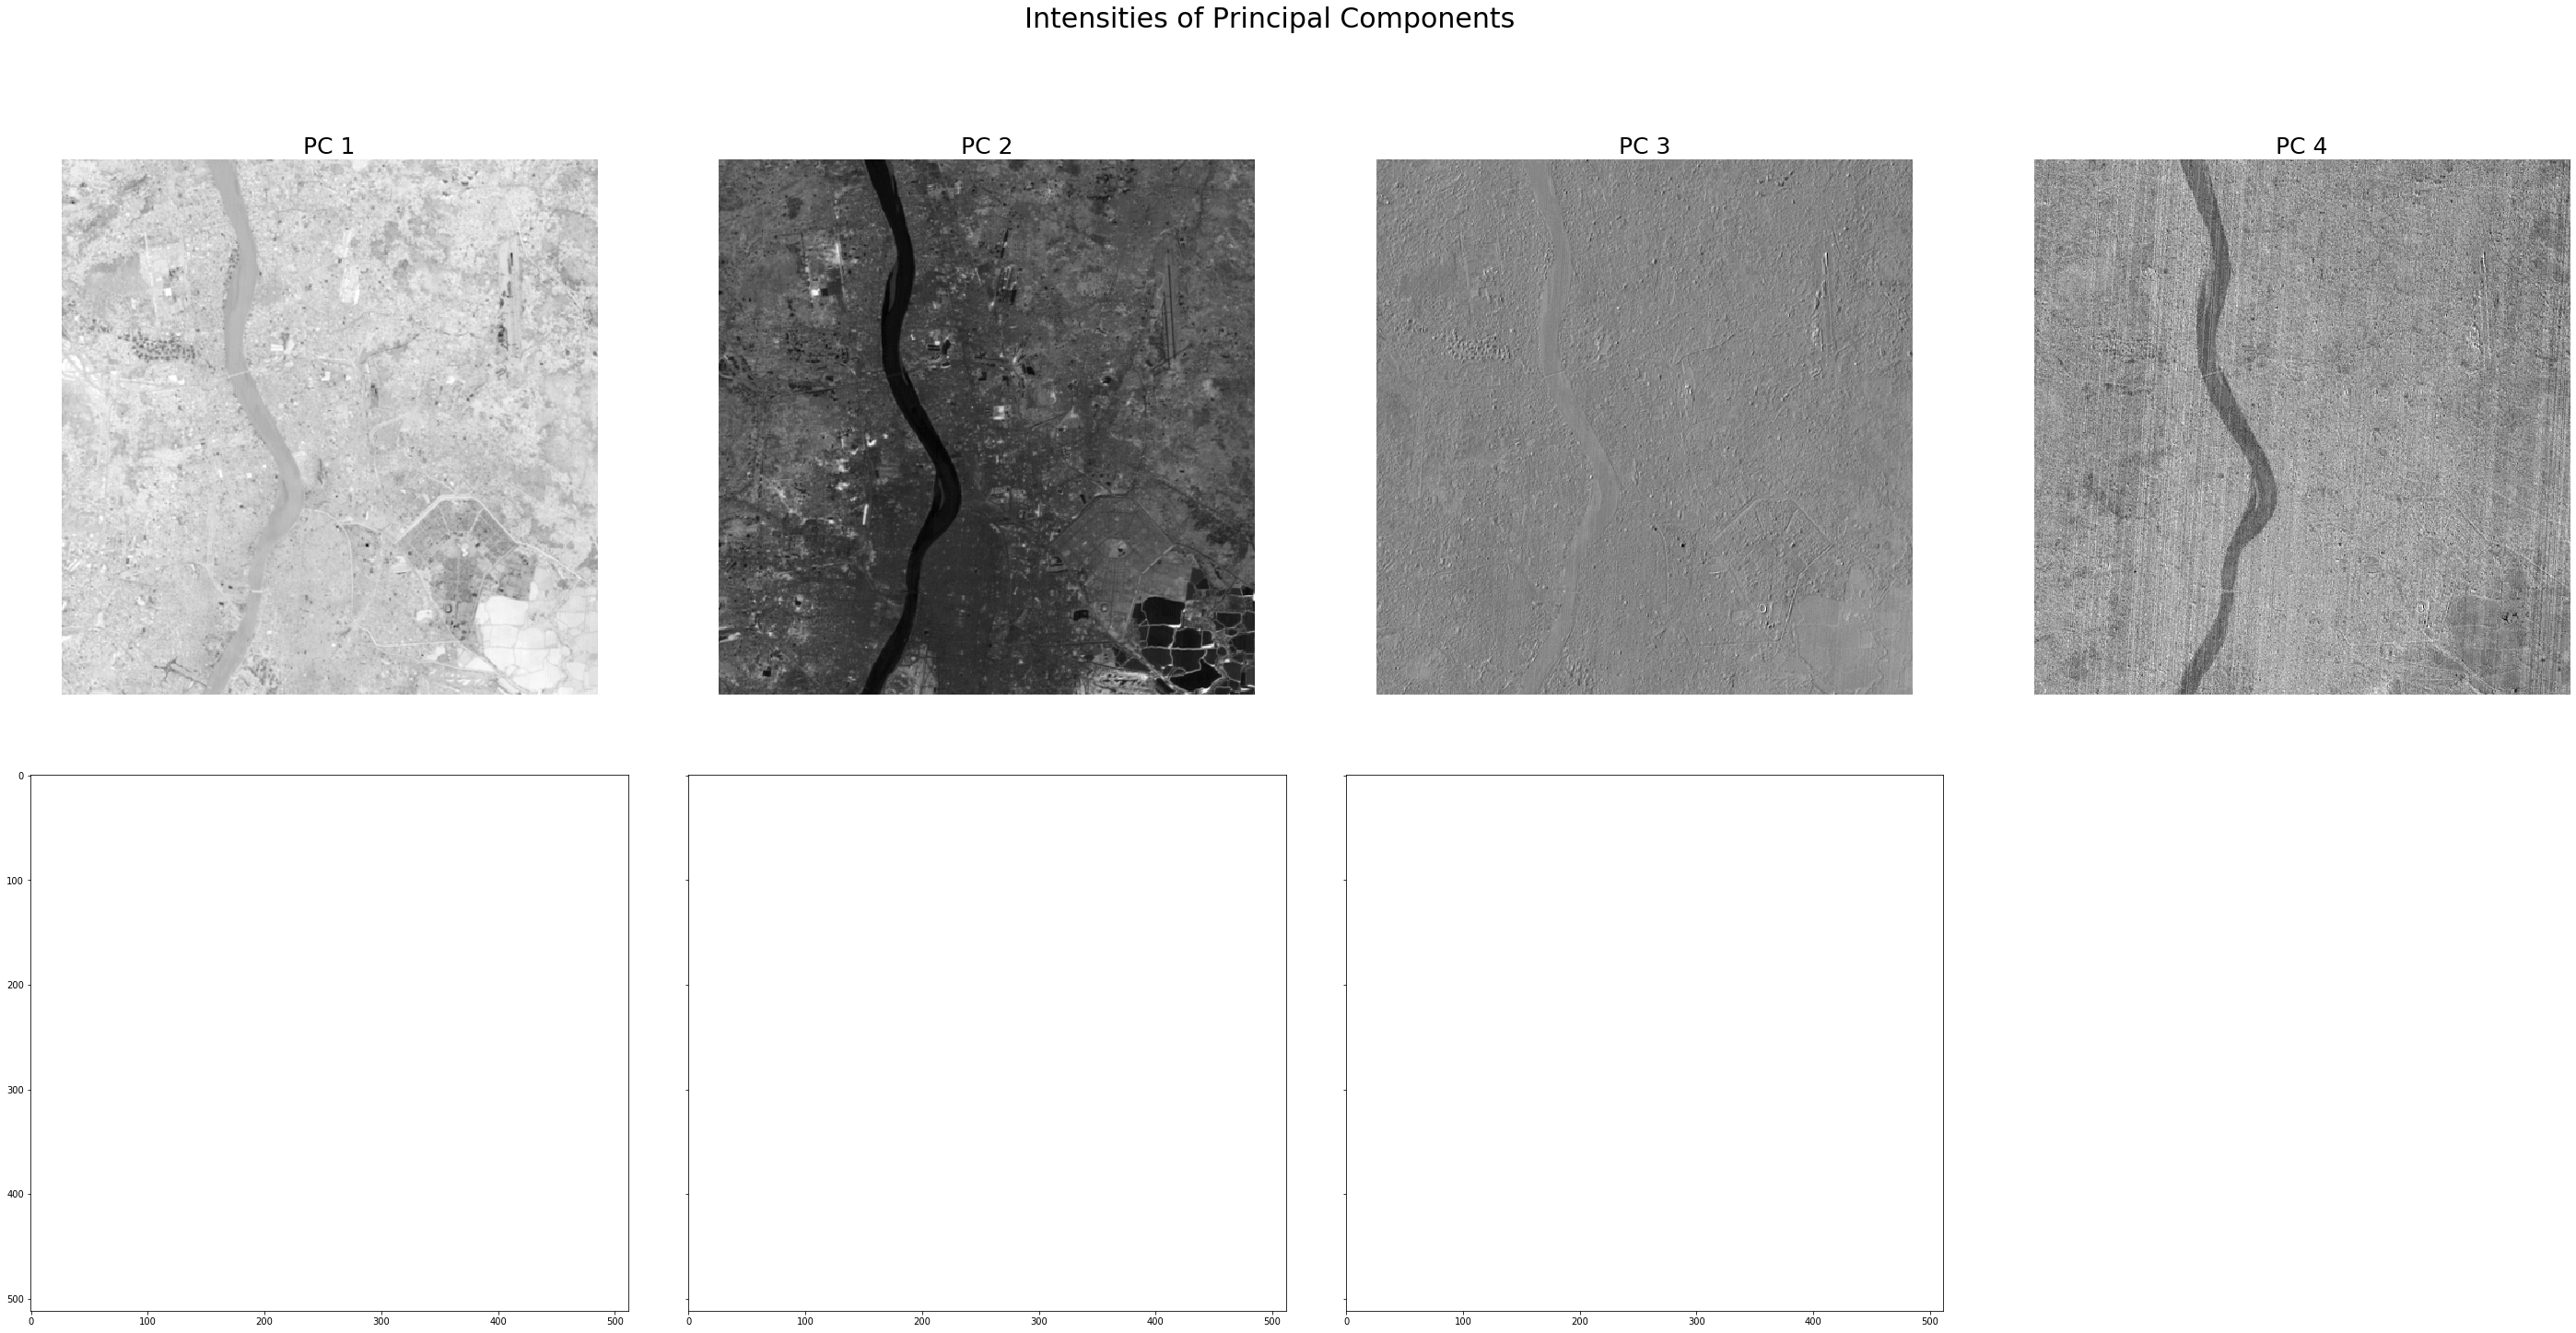

In [10]:
#Shows the PC eigenfaces
fig,axes = plt.subplots(2,4,figsize=(50,23),sharex='all',
                        sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities of Principal Components ', fontsize=30)
axes = axes.ravel()
for i in range(4):
    axes[i].imshow(PC_2d_Norm[:,:,i],cmap='gray', vmin=0, vmax=255)
    axes[i].set_title('PC '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


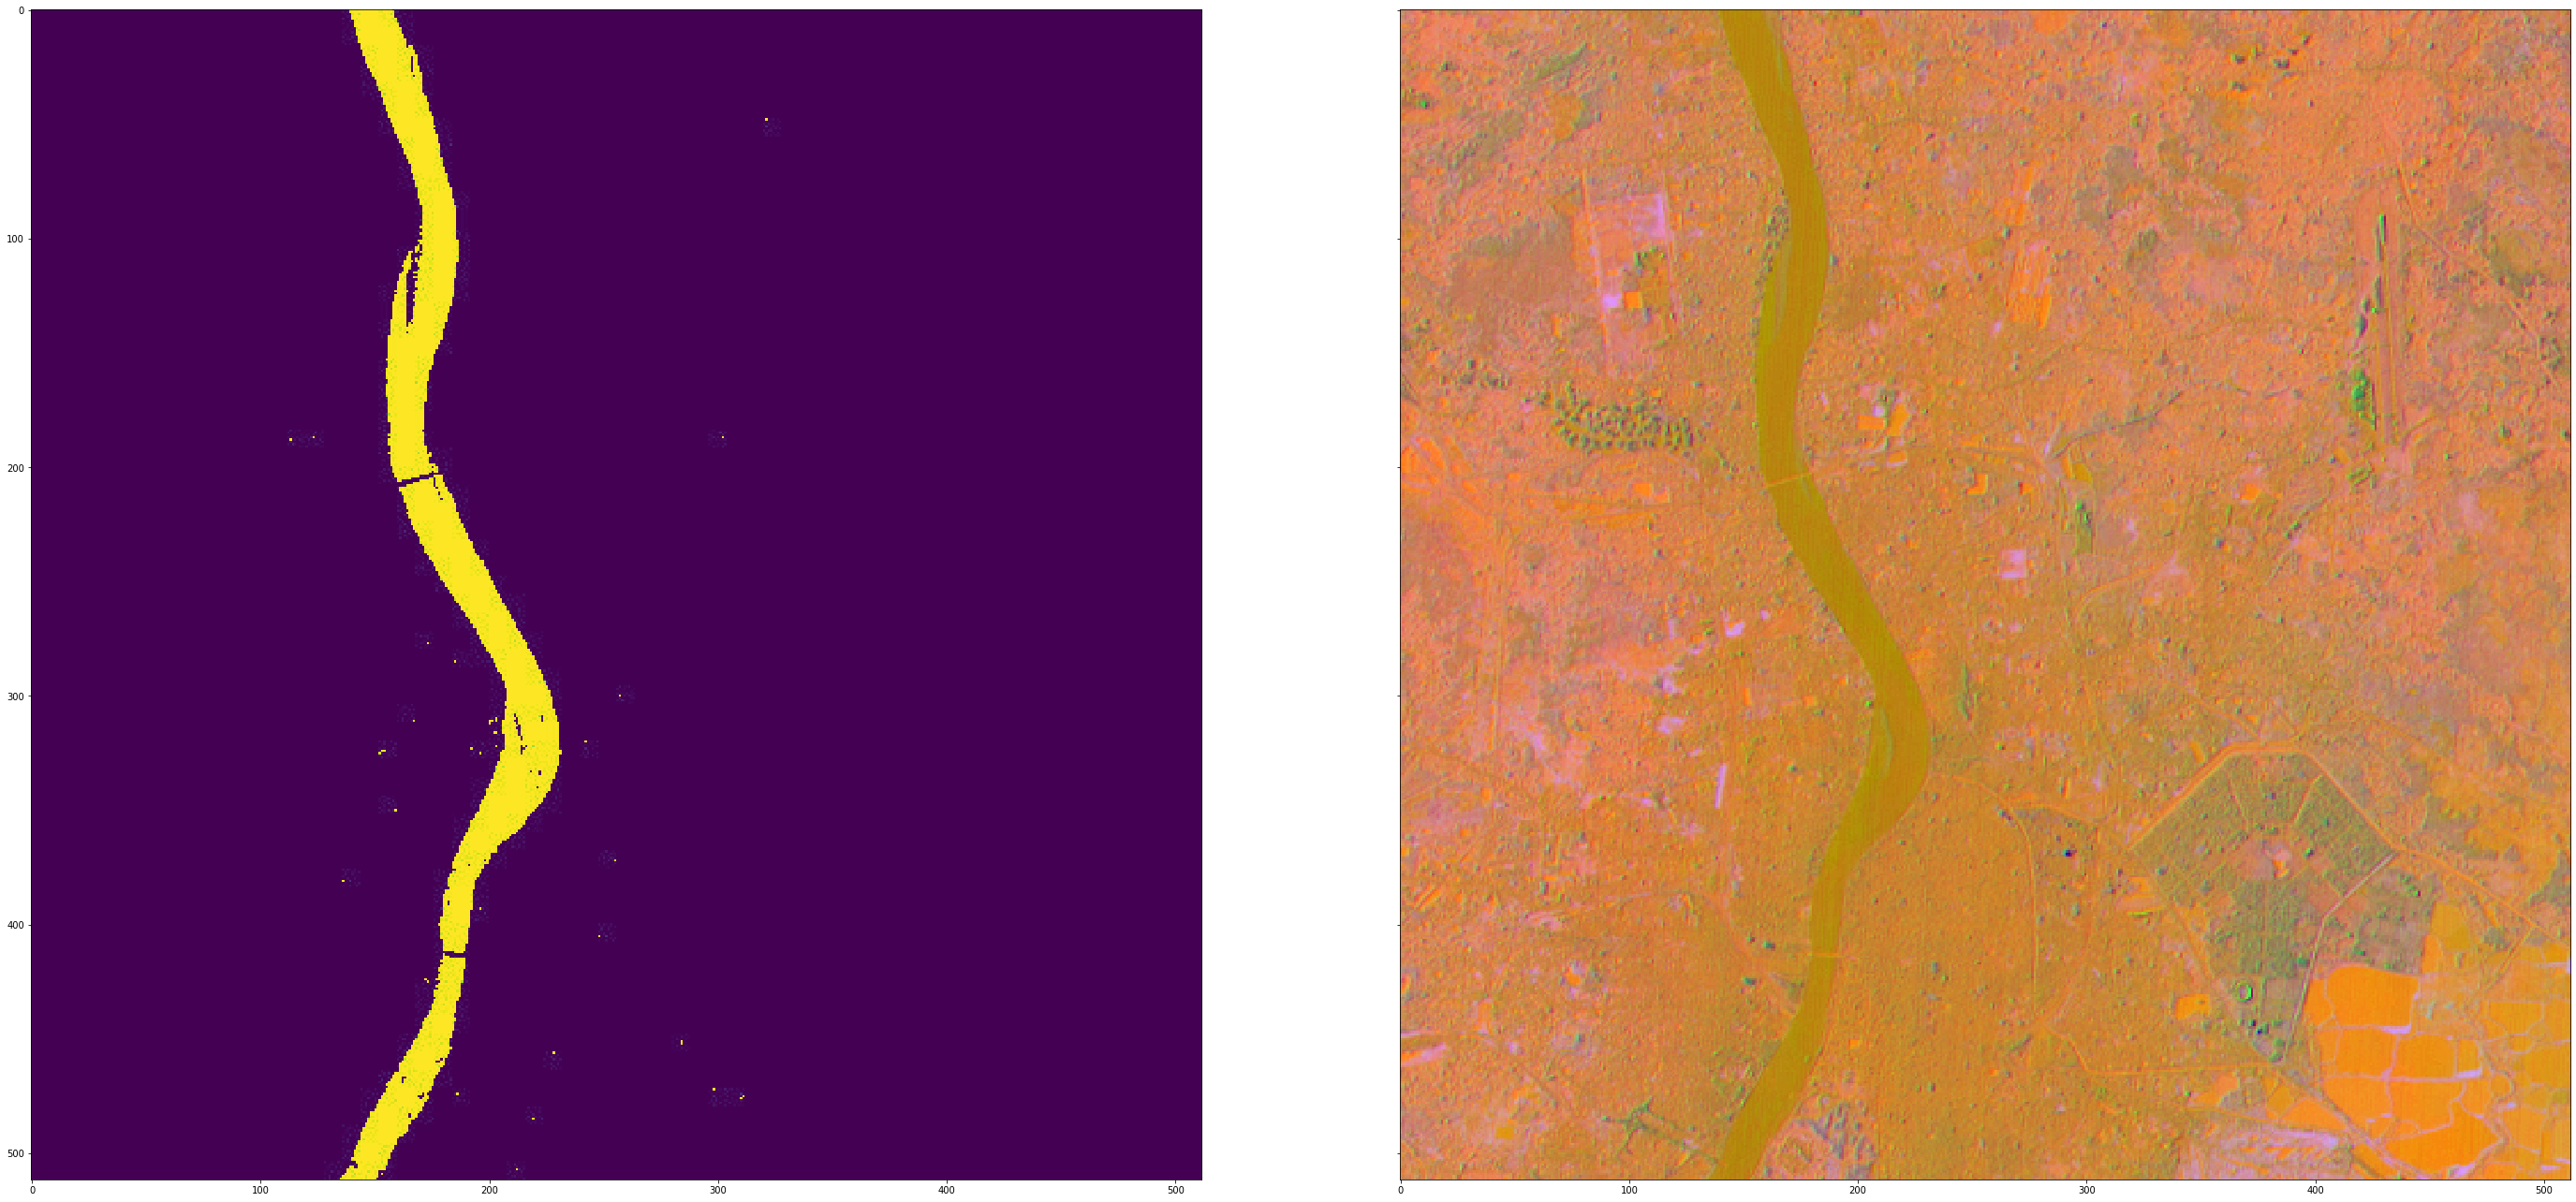

In [12]:
#Plot of original vs reduced final image
fig,axes = plt.subplots(1,2,figsize=(50,23),
                        sharex='all', sharey='all')   
fig.subplots_adjust(wspace=0.1, hspace=0.15)
axes[0].imshow(imread('op1.jpeg').astype(int))
axes[1].imshow(PC_2d_Norm[:,:,:3][:,:,[0,2,1]].astype(int))